# Final Project Purwadhika - Whats Cooking?

## Data Analysis

In [2]:
#Libraries for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_colwidth", -1)

import warnings
warnings.filterwarnings("ignore")

In [3]:
dfRecipe = pd.read_json("train.json")
dfRecipe.head(20)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder]"
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage]"
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries]"
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh]"
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley]"


In [4]:
print("Shape of the dataframe is " + str(dfRecipe.shape))

Shape of the dataframe is (39774, 3)


In [5]:
dfRecipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [6]:
print("There are " + str(dfRecipe["cuisine"].nunique()) + " unique cuisine origins. They are : ")
for a in sorted(dfRecipe["cuisine"].unique()):
    print(a)

There are 20 unique cuisine origins. They are : 
brazilian
british
cajun_creole
chinese
filipino
french
greek
indian
irish
italian
jamaican
japanese
korean
mexican
moroccan
russian
southern_us
spanish
thai
vietnamese


In [7]:
dfRecipe["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish         989 
korean          830 
vietnamese      825 
moroccan        821 
british         804 
filipino        755 
irish           667 
jamaican        526 
russian         489 
brazilian       467 
Name: cuisine, dtype: int64

In [8]:
#Find number of ingredients in each recipes
listLen = []

for b in dfRecipe["ingredients"]:
    listLen.append(len(b))

dfRecipe["num of ingredients"] = listLen
dfRecipe.head(10)

,cuisine,id,ingredients,num of ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]",20
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder]",12
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage]",13
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries]",10
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh]",13
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley]",6


In [9]:
dfRecipe.drop(["id"], axis = 1, inplace = True)

In [10]:
dfRecipe.describe()

,num of ingredients
count,39774.000000
mean,10.767713
std,4.428978
min,1.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,65.000000


In [11]:
#Find out recipe with most ingredients used
dfRecipe[dfRecipe["num of ingredients"] == dfRecipe["num of ingredients"].max()]

,cuisine,ingredients,num of ingredients
15289,italian,"[fettucine, fresh marjoram, minced garlic, olive oil, garlic powder, large eggs, Alfredo sauce, vegetable oil, cajun seasoning, shredded romano cheese, basil dried leaves, salt, cayenne pepper, scallions, red bell pepper, boneless skinless chicken breast halves, soba, pasta sauce, kosher salt, milk, fresh ginger, ground black pepper, flour, cooked chicken, coarse salt, lemon, diced tomatoes, garlic, rice vinegar, NeufchÃ¢tel, garlic cloves, dried parsley, frozen artichoke hearts, penne, pepper, sweet onion, part-skim mozzarella cheese, parmigiano reggiano cheese, basil leaves, onion powder, red wine vinegar, red pepper flakes, orzo, crushed red pepper, all-purpose flour, freshly ground pepper, sliced mushrooms, panko breadcrumbs, plum tomatoes, fresh basil, fresh leav spinach, water, sun-dried tomatoes, ground pepper, grated parmesan cheese, boneless skinless chicken breasts, chicken cutlets, butter, multi-grain penne pasta, extra-virgin olive oil, cilantro leaves, green pepper, shredded mozzarella cheese, fresh parsley, spaghetti]",65


In [12]:
print("There are " + str(len(dfRecipe[dfRecipe["num of ingredients"] == 1])) + " recipes that only use 1 ingredient!")

There are 22 recipes that only use 1 ingredient!


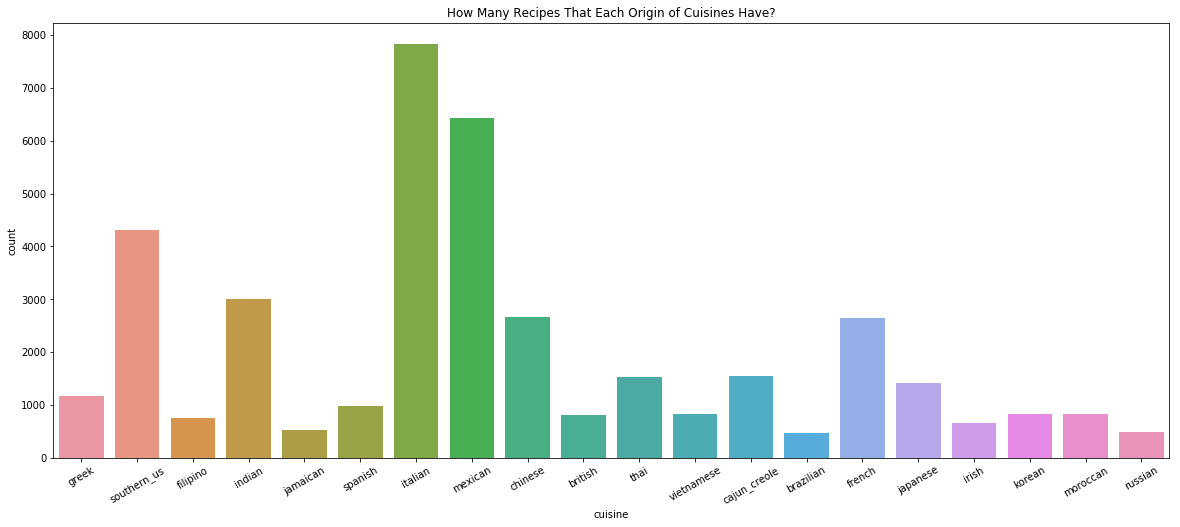

In [13]:
plt.figure(figsize = (20, 8))
ab = sns.countplot(x = "cuisine", data = dfRecipe)
plt.setp(ab.get_xticklabels(), rotation = 30)
plt.title("How Many Recipes That Each Origin of Cuisines Have?")
plt.show()

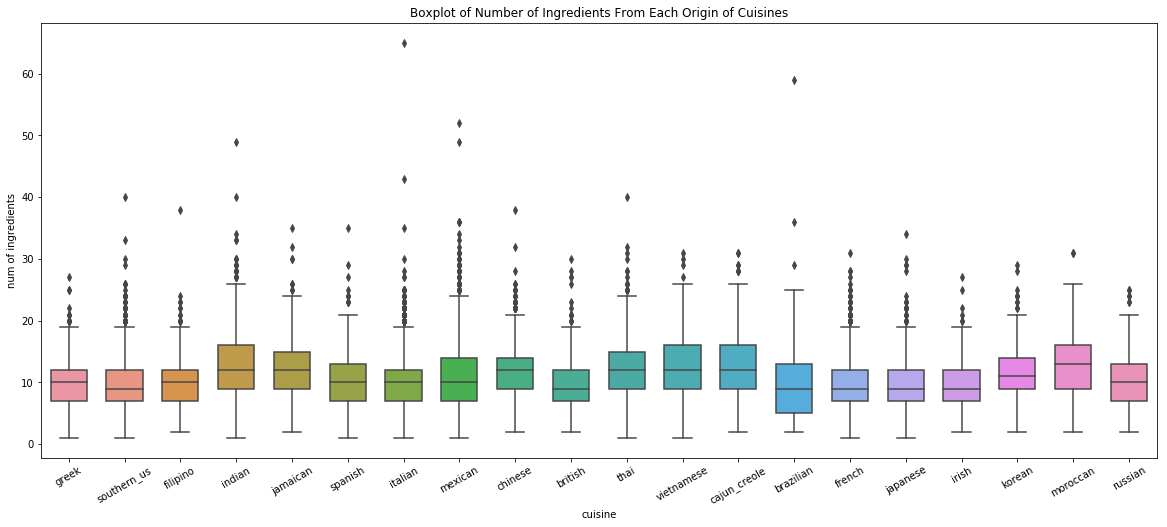

In [14]:
plt.figure(figsize = (20, 8))
ab = sns.boxplot(x = "cuisine", y = "num of ingredients", data = dfRecipe, width = 0.65)
plt.setp(ab.get_xticklabels(), rotation = 30)
plt.title("Boxplot of Number of Ingredients From Each Origin of Cuisines")
plt.show()

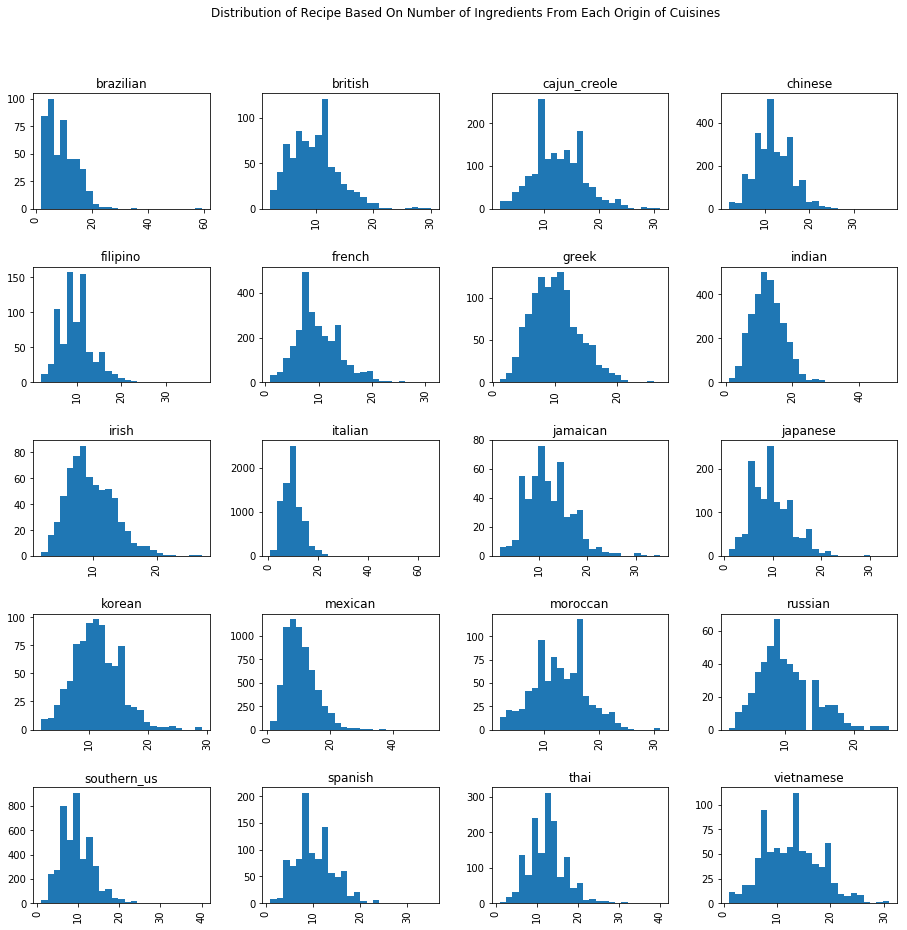

In [15]:
import pylab as pl
dfRecipe.hist(column = "num of ingredients", by = "cuisine", bins = 25, figsize = (15, 15))
pl.suptitle("Distribution of Recipe Based On Number of Ingredients From Each Origin of Cuisines")
plt.show()

In [16]:
#Create data frame for all ingredients
dictIngredients = {}
dfIngredients = pd.DataFrame(columns = ["Ingredients", "Count"])

for i in dfRecipe["ingredients"]:
    for j in i:
        if j not in dictIngredients.keys():
            dictIngredients[j] = 1
        else:
            dictIngredients[j] += 1
            
dfIngredients["Ingredients"] = list(dictIngredients.keys())
dfIngredients["Count"] = list(dictIngredients.values())

In [30]:
dfRecipe["ingredients"][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [17]:
print("There are " + str(len(dfIngredients["Ingredients"])) + " different ingredients used in all recipes!")

There are 6714 different ingredients used in all recipes!


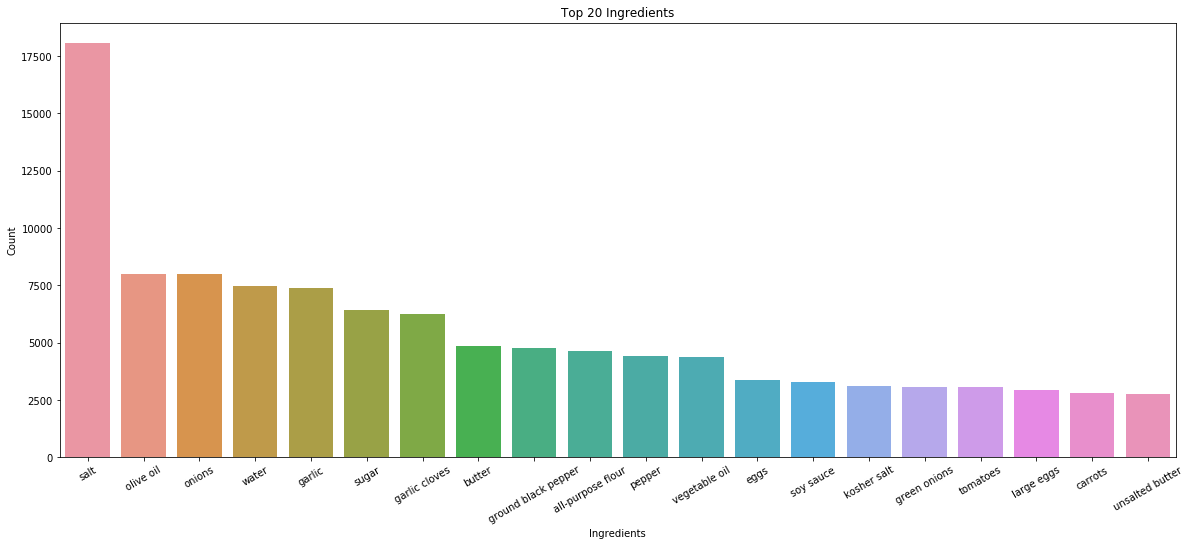

In [18]:
plt.figure(figsize = (20, 8))
a = dfIngredients.sort_values(by = "Count", ascending = False).head(20)
ax = sns.barplot(x = "Ingredients", y = "Count", data = a)
plt.setp(ax.get_xticklabels(), rotation = 30)
plt.title("Top 20 Ingredients")
plt.show()

In [20]:
#Create data frame for regions and ingredients used in each region
dfCuisine = pd.DataFrame()
listCuisine, listIng, listNum = [], [], []

for b in sorted(dfRecipe["cuisine"].unique()):    
    listIng2 = []
    dfB = dfRecipe[dfRecipe["cuisine"] == b]
    for c in dfB["ingredients"]:
        for d in c:
            if d not in listIng2:
                listIng2.append(d)
    listCuisine.append(b)
    listIng.append(listIng2)
    listNum.append(len(listIng2))

dfCuisine["Cuisine"] = listCuisine
dfCuisine["Ingredients"] = listIng
dfCuisine["Num of Ingredients"] = listNum

In [21]:
dfCuisine.head()

,Cuisine,Ingredients,Num of Ingredients
0,brazilian,"[ice cubes, club soda, white rum, lime, turbinado, eggs, hearts of palm, cilantro, coconut cream, flax seed meal, kosher salt, jalapeno chilies, garlic, cream cheese, soften, coconut oil, lime juice, crushed red pepper flakes, ground coriander, pepper, chicken breasts, coconut flour, onions, sweetened condensed milk, butter, cocoa powder, crushed ice, simple syrup, cachaca, sugar, corn starch, egg whites, boiling water, cold water, egg yolks, milk, Jell-O Gelatin Dessert, olive oil, low sodium chicken broth, cilantro leaves, chile powder, fresh thyme, chile pepper, sweet paprika, sablefish, brown rice, yellow onion, low-fat coconut milk, roma tomatoes, fresh lime juice, grating cheese, tapioca flour, salt, coconut milk, frozen banana, pure acai puree, almond butter, dijon mustard, boneless skinless chicken breast halves, caraway seeds, ground black pepper, lime wedges, chopped cilantro, lager beer, peeled fresh ginger, garlic cloves, green bell pepper, unsalted butter, vegetable oil, whole milk, extra-virgin olive oil, corn kernels, all-purpose flour, celery ribs, Italian seasoned breadcrumbs, green onions, carrots, tomatoes, roasted red peppers, long-grain rice, chicken pieces, white wine, bay leaves, clove, beef broth, fresh lemon juice, white onion, xuxu, large shrimp, orange, raspberries, granola, mango, juice, coconut, frozen mixed berries, bananas, ice, fish fillets, marinade, coarse sea salt, ...]",853
1,british,"[greek yogurt, lemon curd, confectioners sugar, raspberries, demerara sugar, egg whites, fruit, butter, dried currants, frozen pastry puff sheets, mixed spice, white sugar, milk, salt, flour, eggs, lard, savoy cabbage, unsalted butter, baking potatoes, black pepper, buttermilk, sugar, jam, baking soda, all-purpose flour, pepper, garlic cloves, onions, leg of lamb, pearl barley, celery, parsley, carrots, tomatoes, white wine, whole milk, ice water, asparagus tips, nutmeg, fresh chives, zucchini, artichokes, tuna, black peppercorns, spring onions, portabello mushroom, medium eggs, capers, water, watercress, heavy cream, allspice berries, russet potatoes, cornmeal, fish fillets, old bay seasoning, vegetable oil, beer, mint, large eggs, berries, ground cinnamon, ground nutmeg, grated lemon peel, melted butter, granulated sugar, baking powder, figs, graham cracker crumbs, sprinkles, marmite, cream cheese, bagels, fino sherry, peeled fresh ginger, ground ginger, crystallized ginger, pecan halves, vanilla extract, dark brown sugar, dark molasses, caster, salad leaves, scallops, garden peas, mild olive oil, white wine vinegar, maldon sea salt, bacon rind, runny honey, superfine sugar, vanilla, boiling water, pitted date, double cream, golden syrup, self-rising cake flour, glace cherries, egg yolks, ...]",1166
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, mango, stock, chile pepper, onions, red chili peppers, oil, chicken broth, chicken breasts, hot sauce, red bell pepper, potatoes, bacon, garlic cloves, fresh parsley, andouille sausage, cajun seasoning, peanut oil, celery, ground red pepper, all-purpose flour, shrimp, olive oil, diced tomatoes, Johnsonville Andouille Dinner Sausage, parsley, jambalaya rice mix, worcestershire sauce, hot pepper sauce, creole seasoning, pecans, golden brown sugar, crumbled blue cheese, chuck, hamburger buns, mayonaise, ground black pepper, salt, okra pods, watercress, fresh lemon juice, kosher salt, kielbasa, celery ribs, large garlic cloves, long-grain rice, cayenne pepper, medium shrimp, ham, Corn Flakes Cereal, yellow corn meal, coleslaw, catfish fillets, cooking spray, chopped celery, fire roasted diced tomatoes, sweet pepper, red kidnei beans, rins and drain, chicken stock, unsalted butter, scallions, canola oil, dried thyme, yellow onion, green bell pepper, dried basil, flour, ground white pepper, boneless chicken skinless thigh, cooked white rice, collard greens, butter, fillets, white wine vinegar, cheddar chees

In [19]:
listUniqueIng, listUniqueNum = [], []
for a, b in enumerate(dfCuisine["Cuisine"]):
    listUniqueIng2 = []
    bigList = []
    for y in dfCuisine[dfCuisine["Cuisine"] != b]["Ingredients"]:
        for z in y:
            if z not in bigList:
                bigList.append(z)

    for c in dfCuisine["Ingredients"][a]:
        if c not in bigList:
            listUniqueIng2.append(c)
    listUniqueIng.append(listUniqueIng2)
    listUniqueNum.append(len(listUniqueIng2))
    
dfCuisine["Unique Ingredients"] = listUniqueIng
dfCuisine["Num of Unique Ingredients"] = listUniqueNum

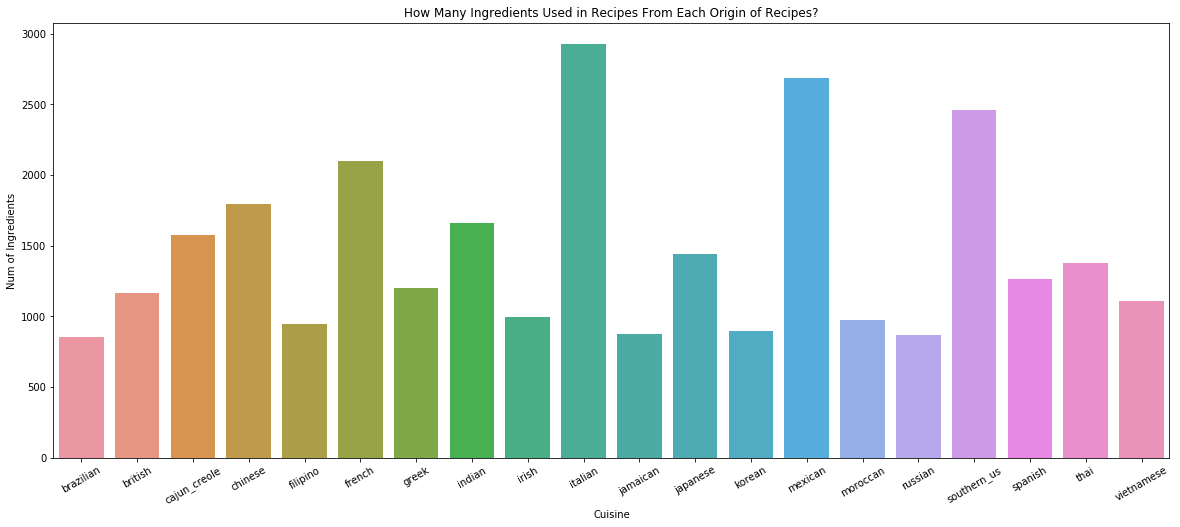

In [20]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = "Cuisine", y = "Num of Ingredients", data = dfCuisine)
plt.setp(ax.get_xticklabels(), rotation = 30)
plt.title("How Many Ingredients Used in Recipes From Each Origin of Recipes?")
plt.show()

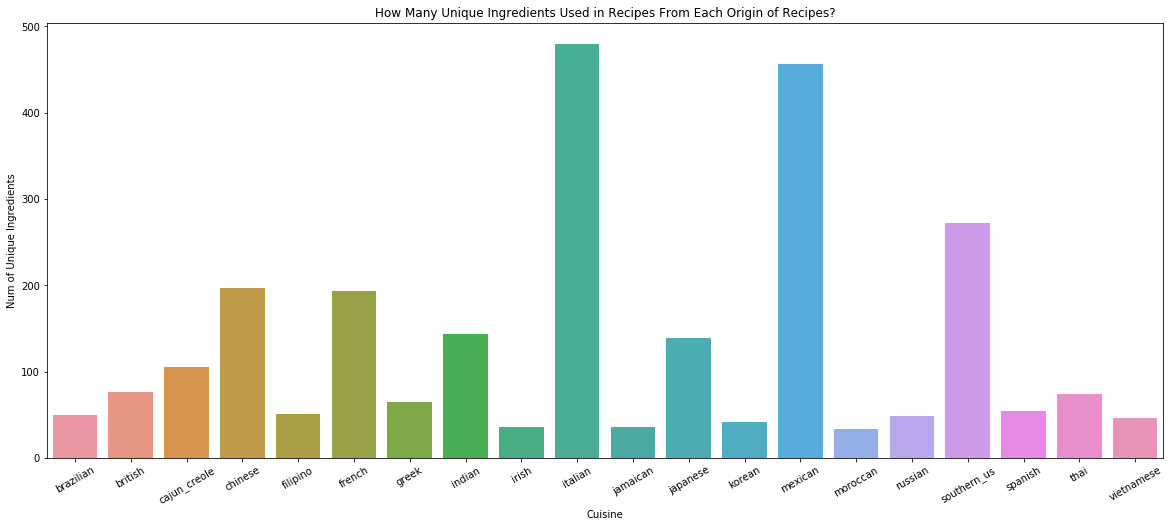

In [21]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = "Cuisine", y = "Num of Unique Ingredients", data = dfCuisine)
plt.setp(ax.get_xticklabels(), rotation = 30)
plt.title("How Many Unique Ingredients Used in Recipes From Each Origin of Recipes?")
plt.show()

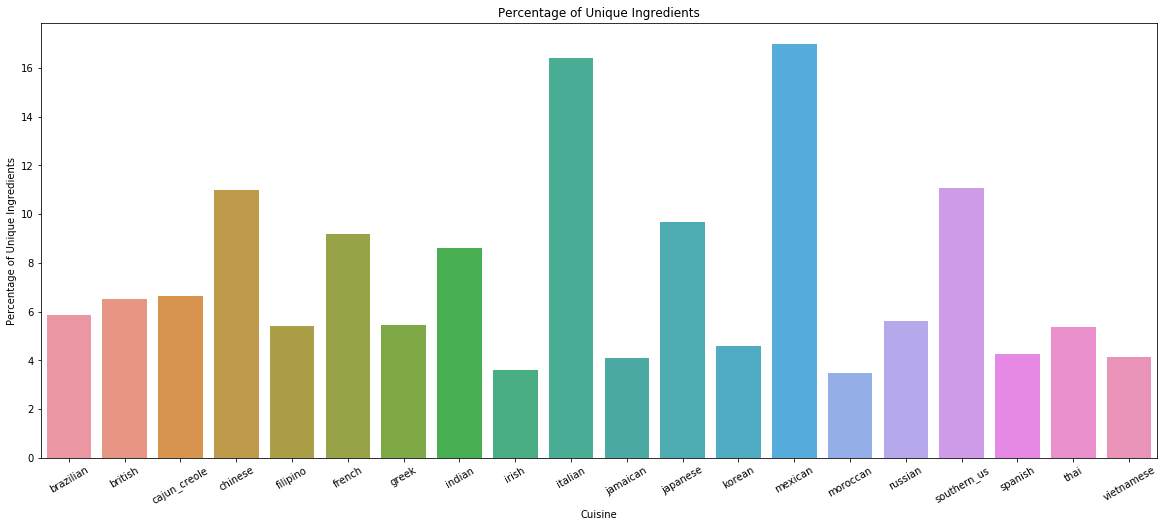

In [22]:
listPct = []
for a, b in enumerate(dfCuisine["Cuisine"]):
    listPct.append(round(float((dfCuisine["Num of Unique Ingredients"][a] / dfCuisine["Num of Ingredients"][a]) * 100), 2))
dfCuisine["Percentage of Unique Ingredients"] = listPct

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = "Cuisine", y = "Percentage of Unique Ingredients", data = dfCuisine)
plt.setp(ax.get_xticklabels(), rotation = 30)
plt.title("Percentage of Unique Ingredients")
plt.show()

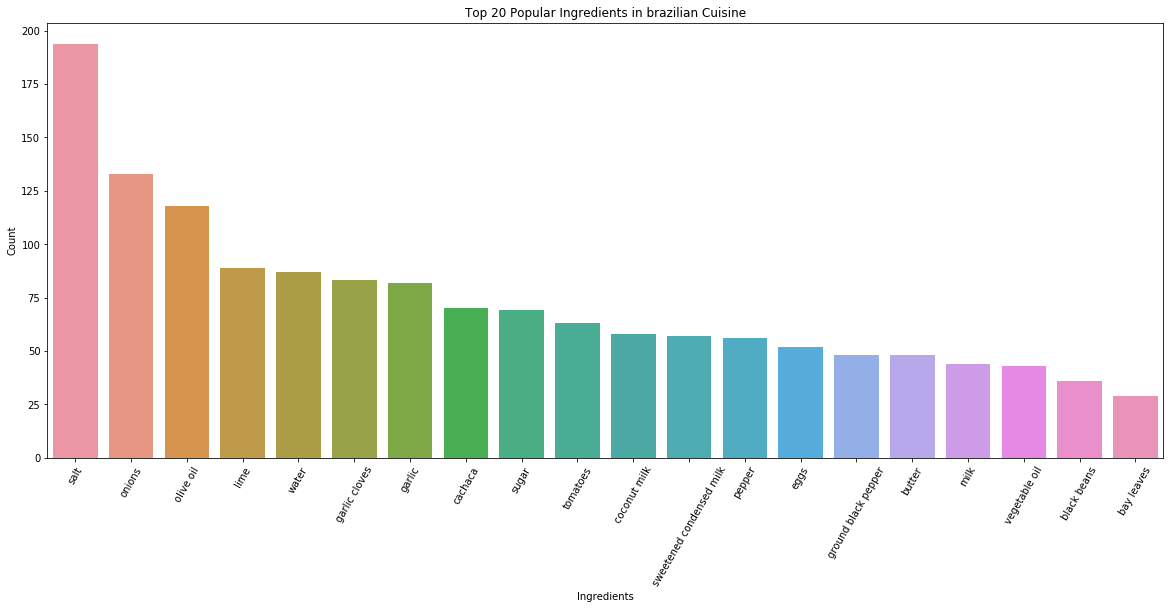

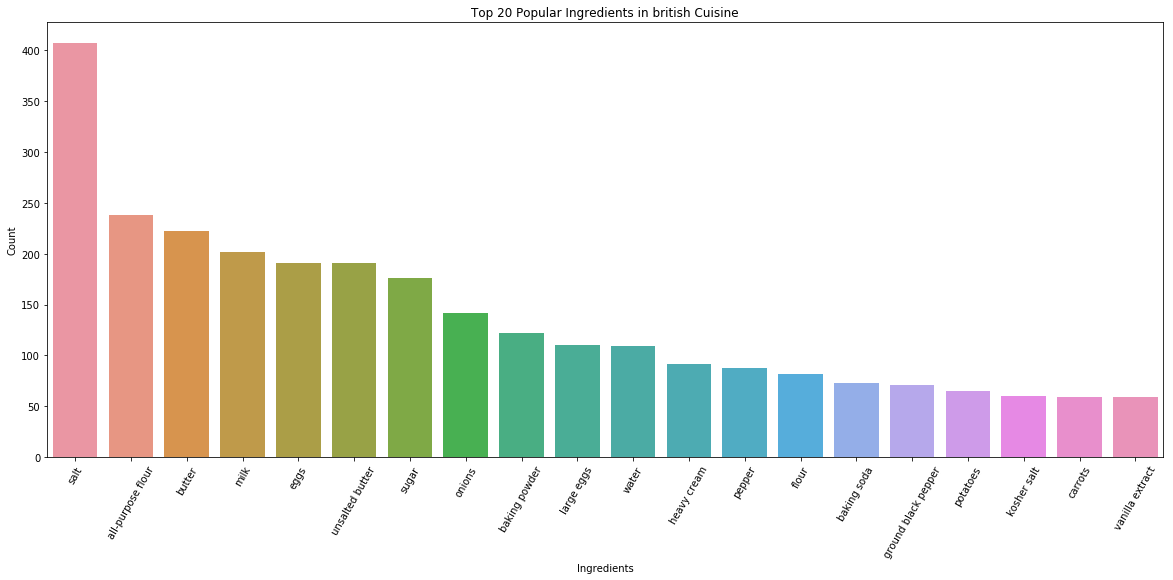

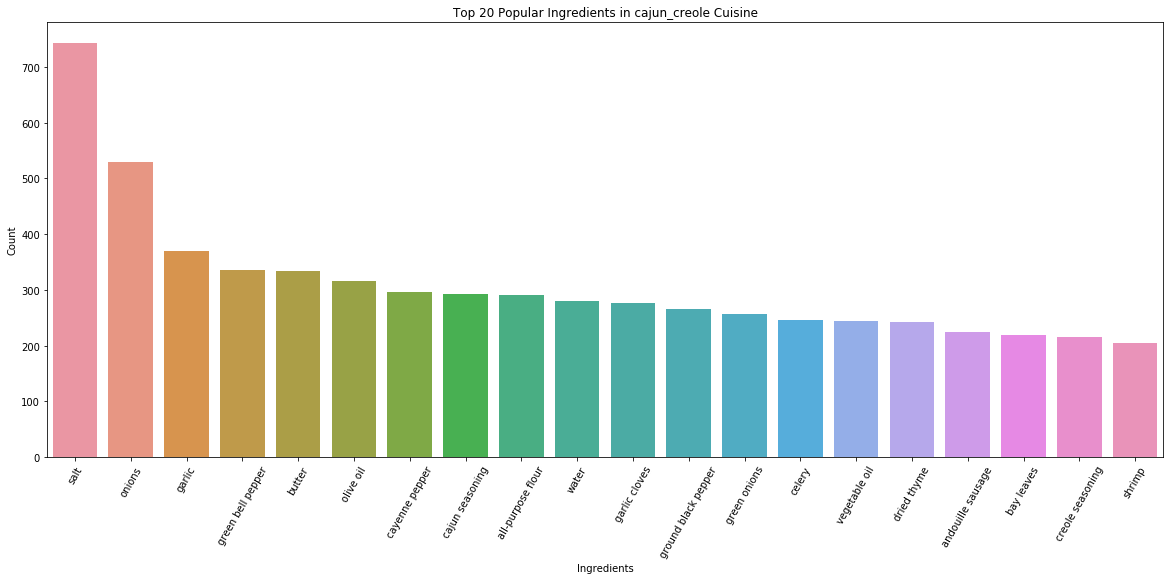

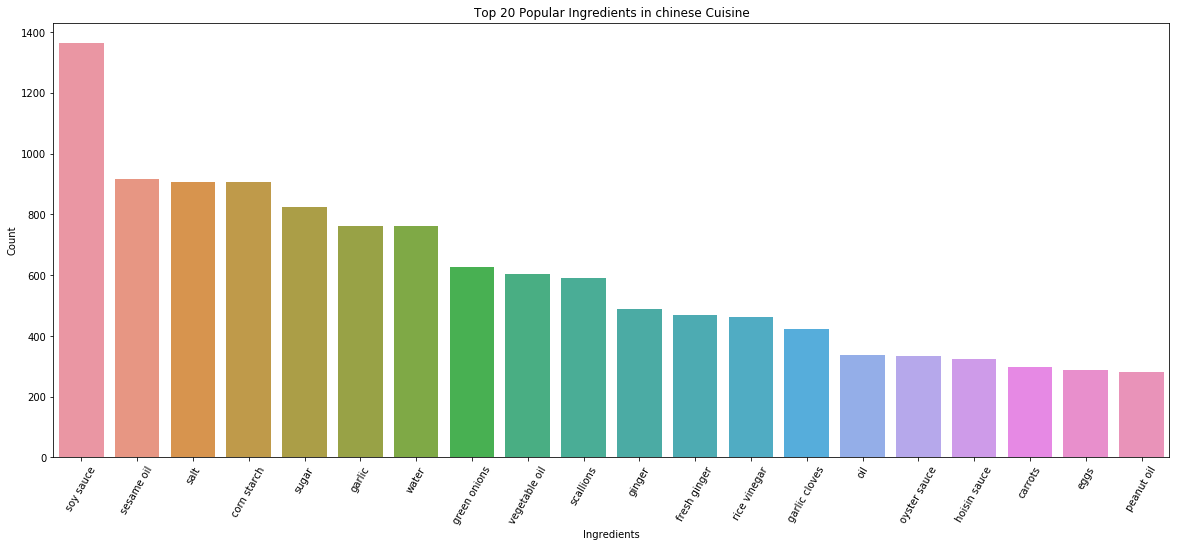

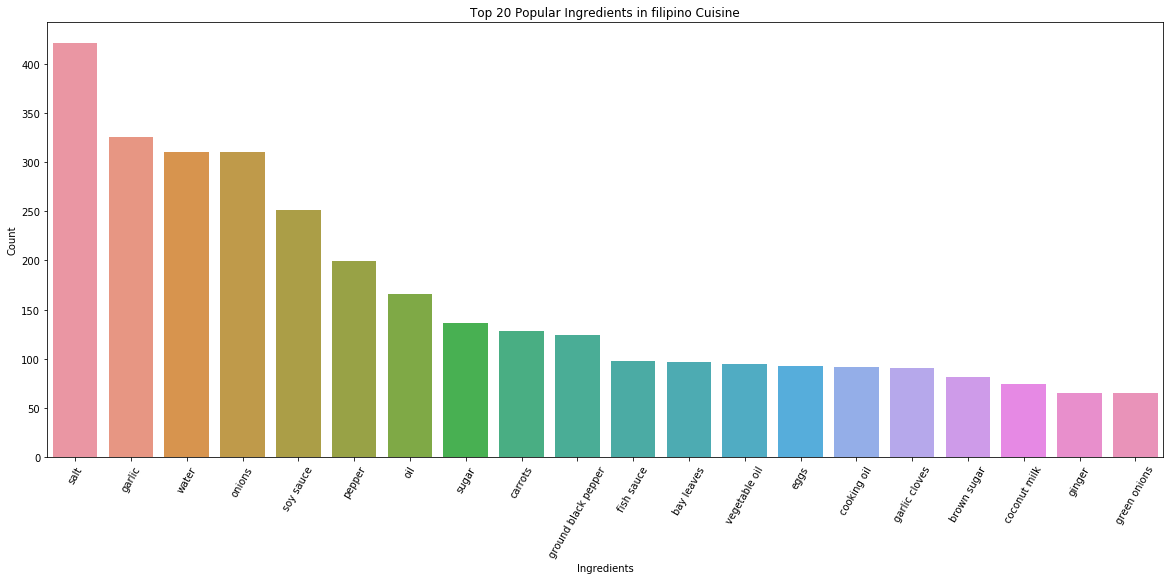

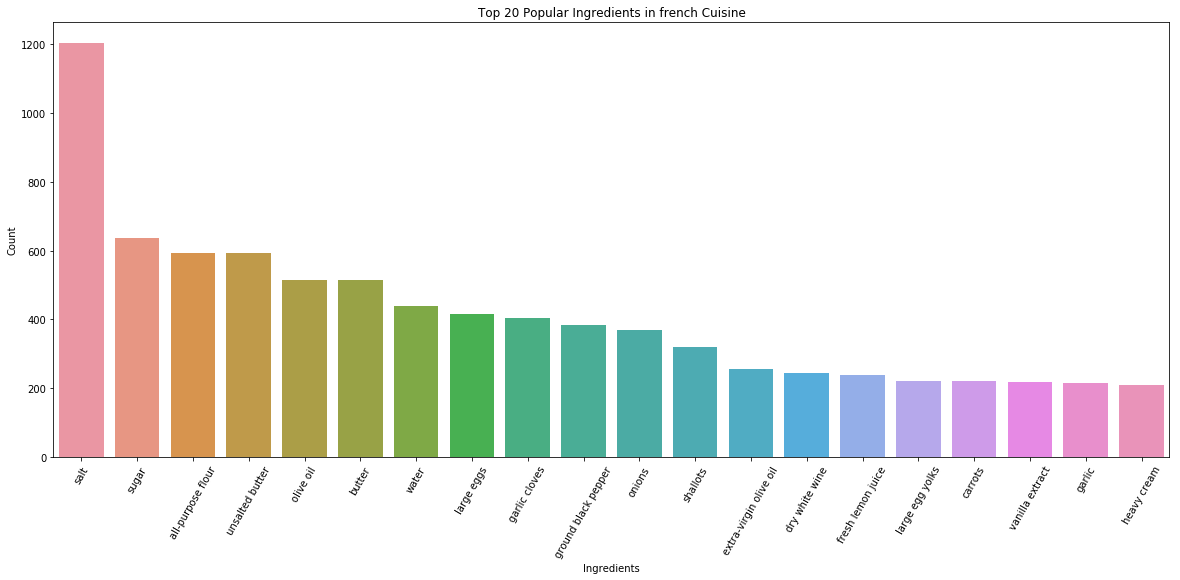

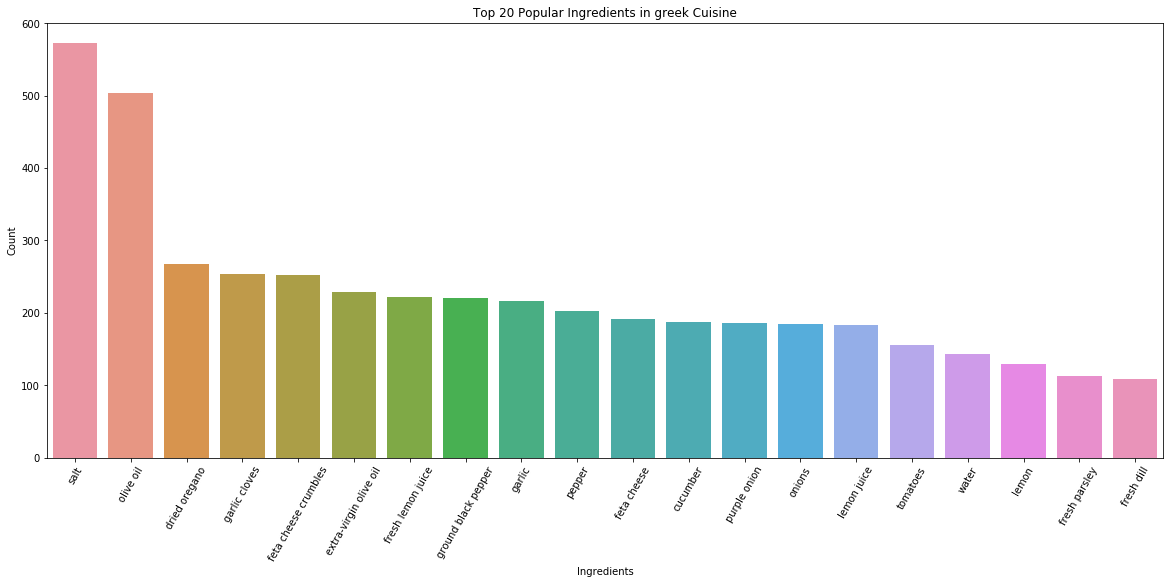

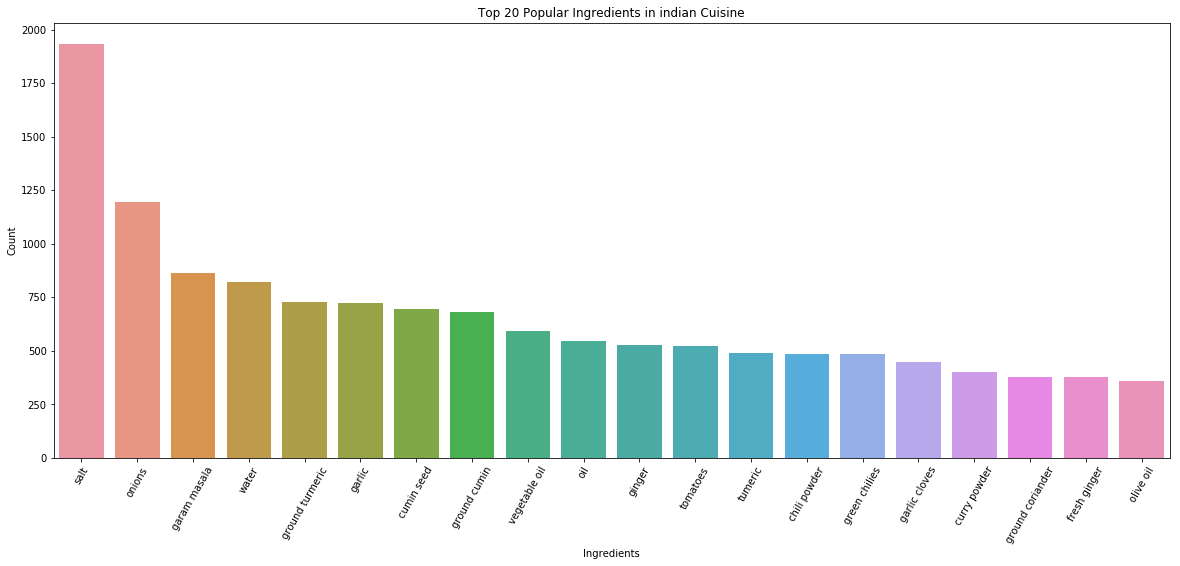

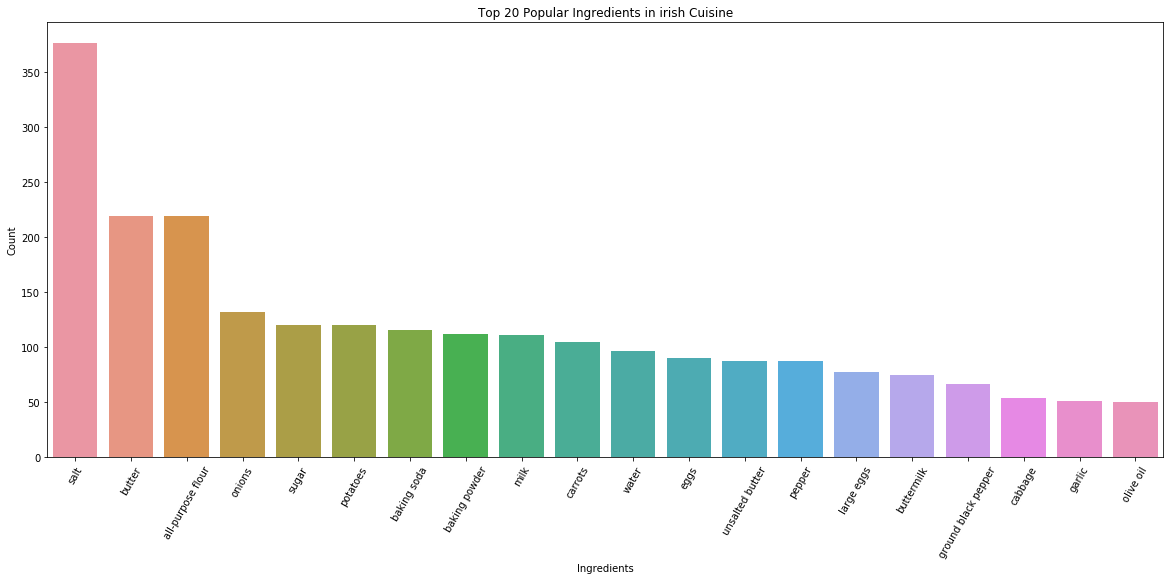

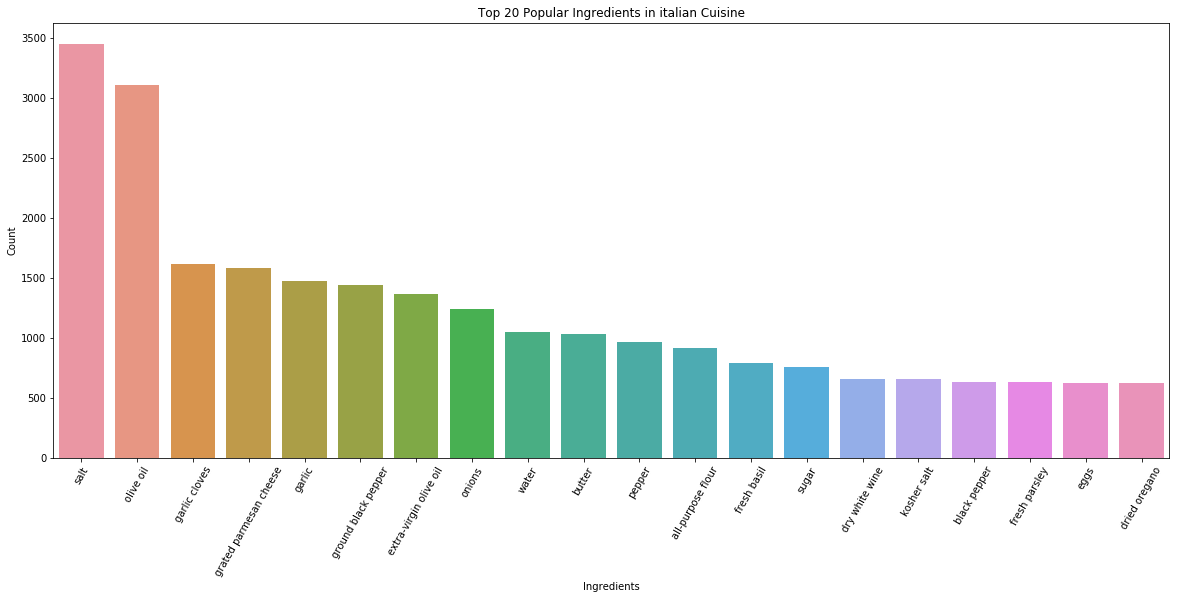

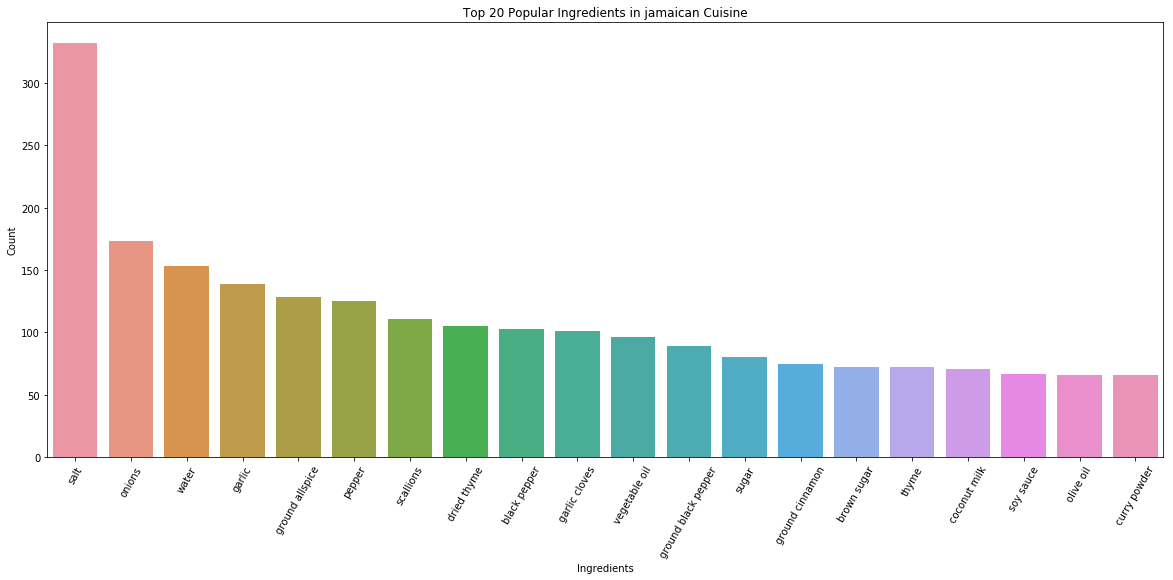

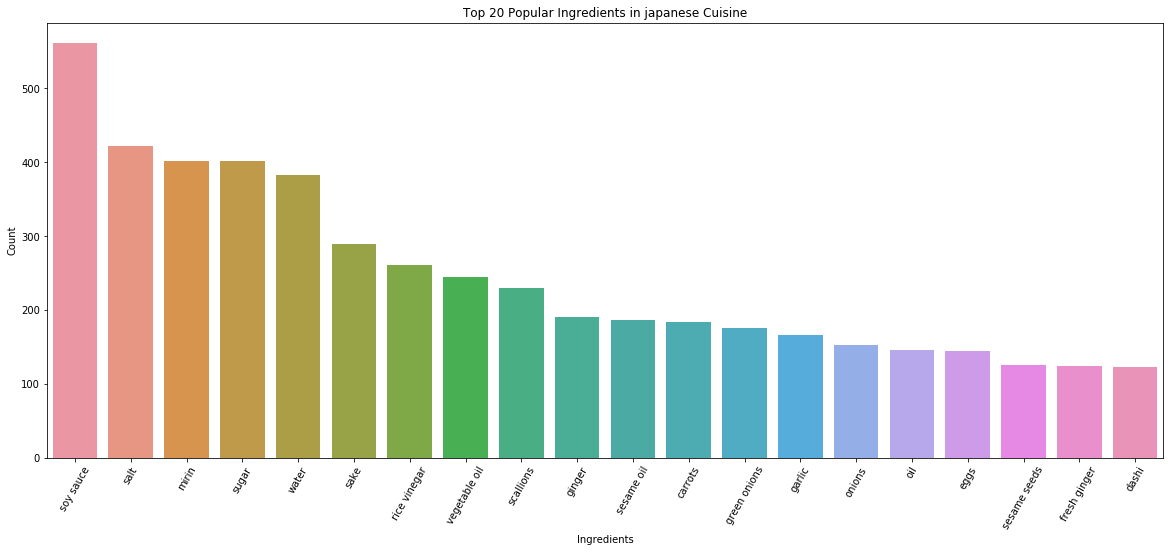

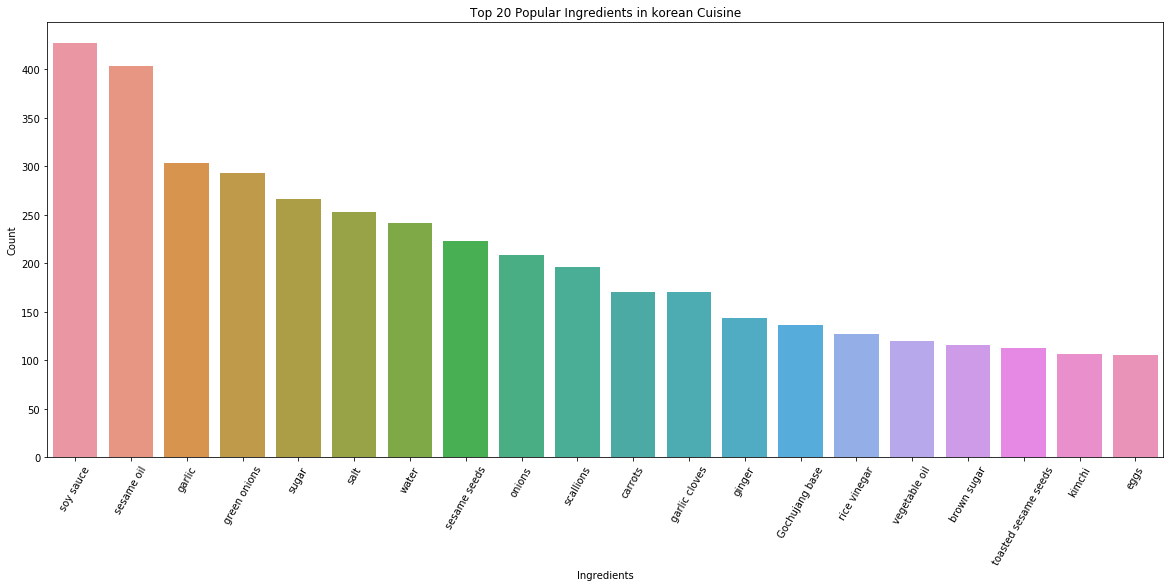

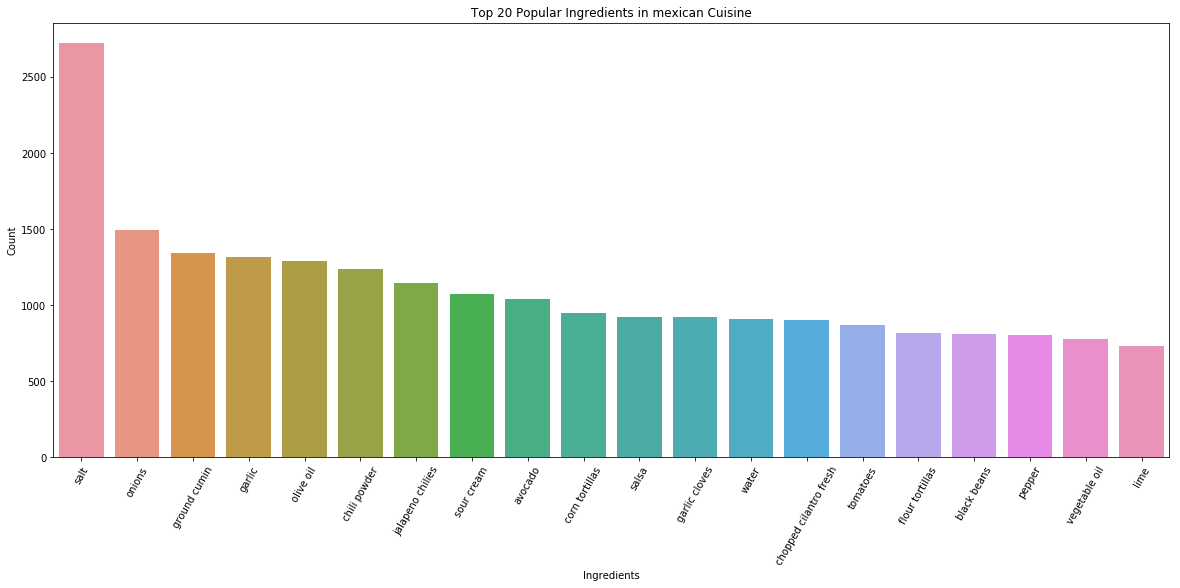

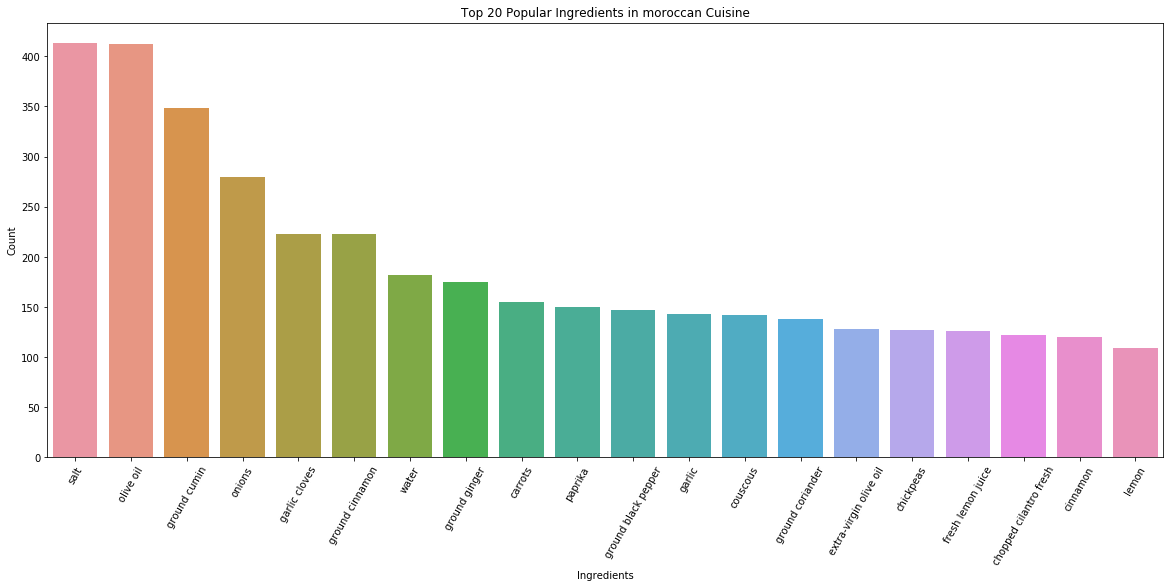

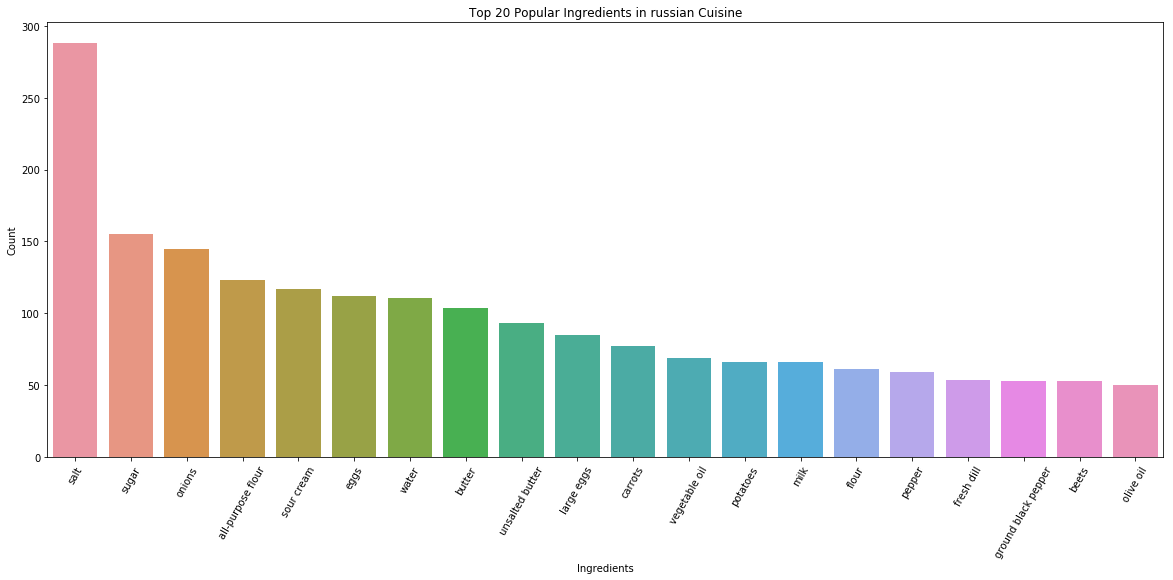

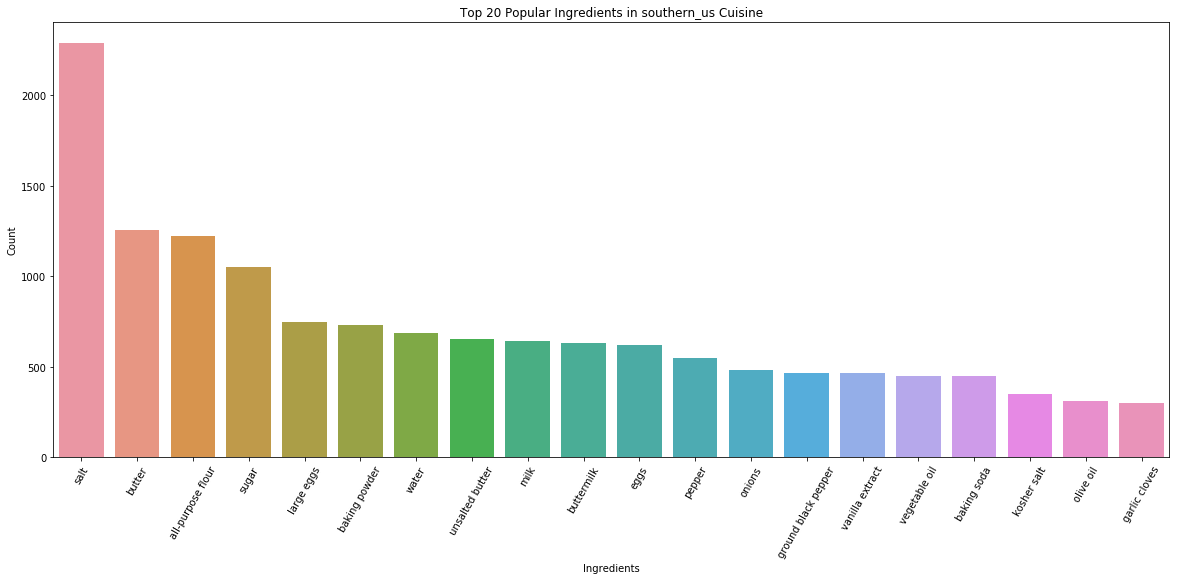

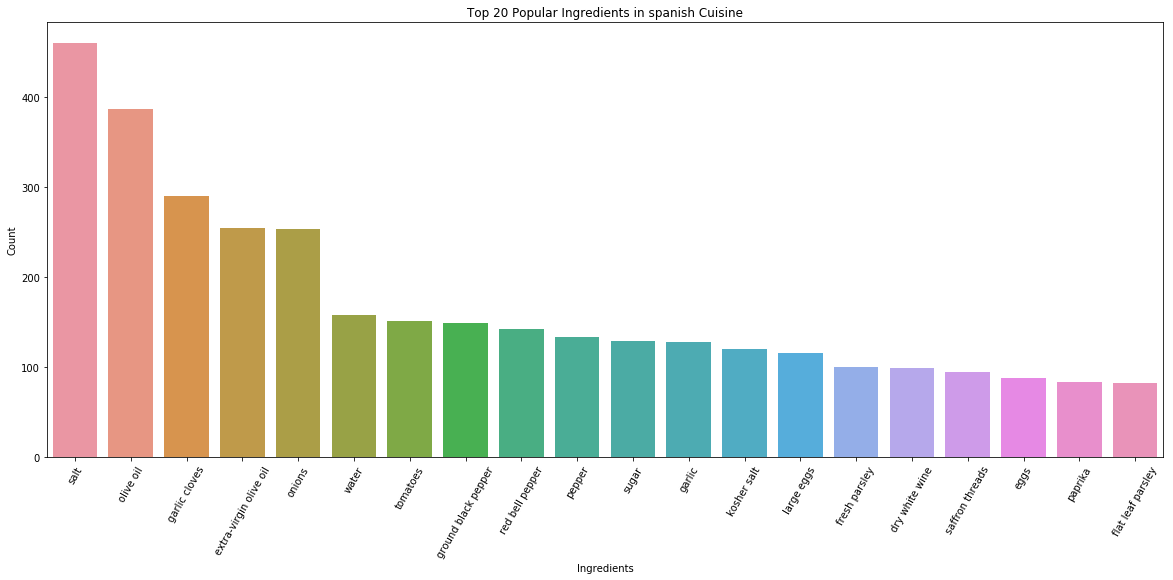

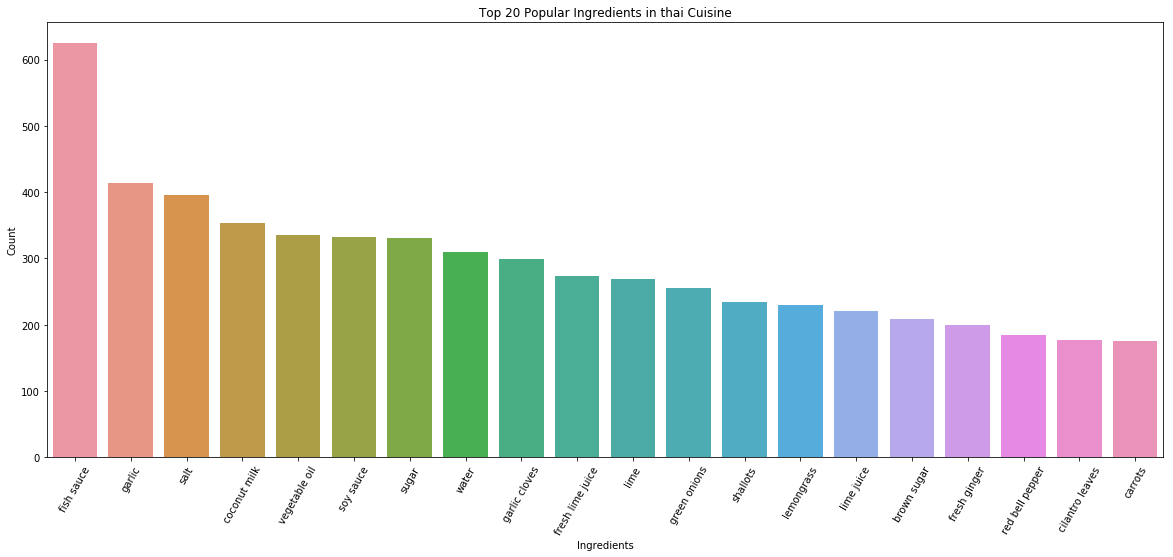

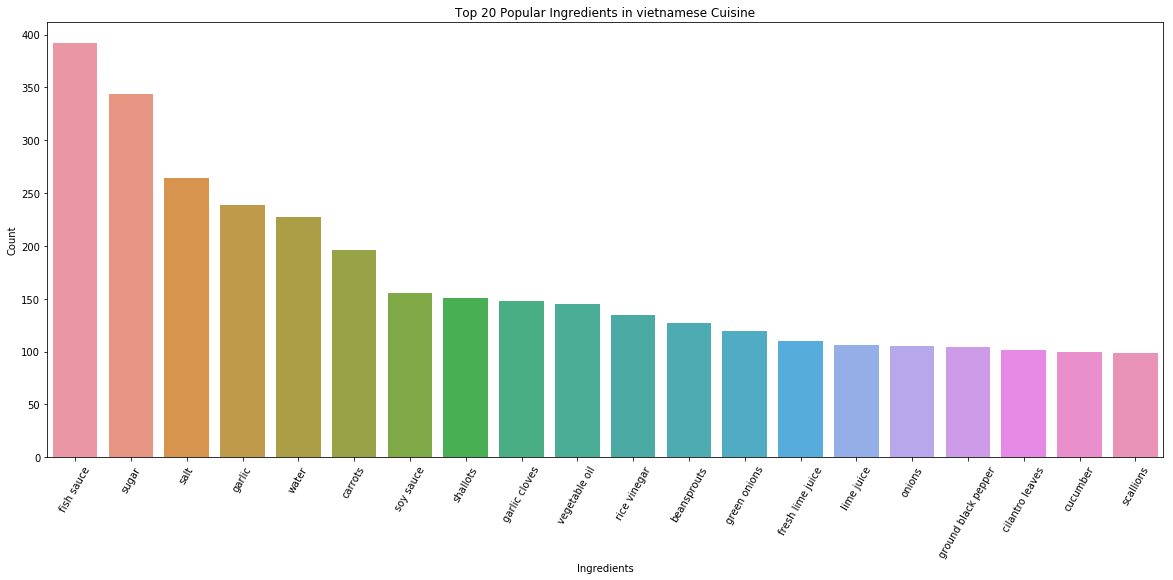

In [23]:
for i in dfCuisine["Cuisine"]:
    dictCuisIng = {}
    dfCuisIng = pd.DataFrame(columns = ["Ingredients", "Count"])
    for j in dfRecipe[dfRecipe["cuisine"] == i]["ingredients"]:            
        for k in j:
            if k not in dictCuisIng.keys():
                dictCuisIng[k] = 1
            else:
                dictCuisIng[k] += 1
                
    dfCuisIng["Ingredients"] = list(dictCuisIng.keys())
    dfCuisIng["Count"] = list(dictCuisIng.values())
    
    plt.figure(figsize = (20, 8))
    a = dfCuisIng.sort_values(by = "Count", ascending = False).head(20)
    ax = sns.barplot(x = "Ingredients", y = "Count", data = a)
    plt.setp(ax.get_xticklabels(), rotation = 60)
    plt.title("Top 20 Popular Ingredients in " + str(i) + " Cuisine")
    plt.show()

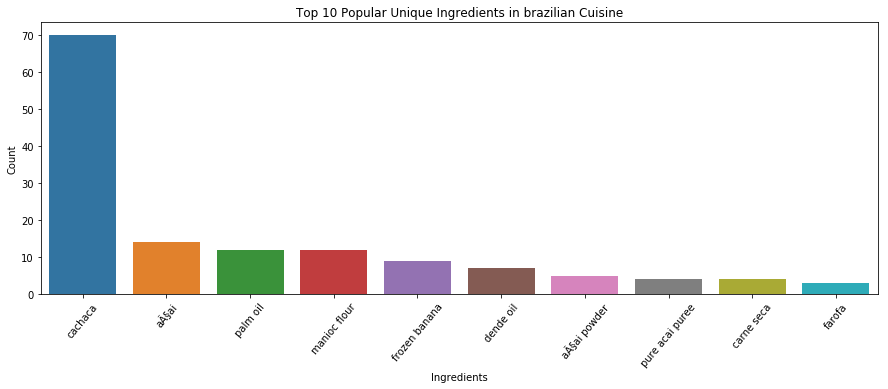

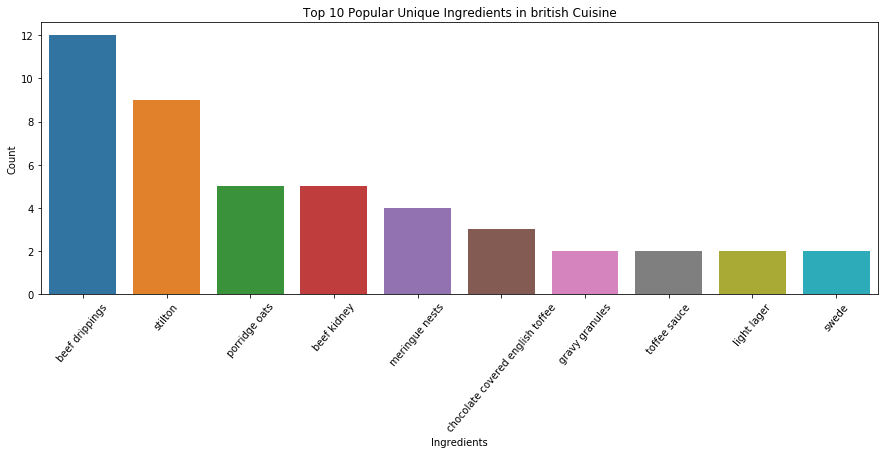

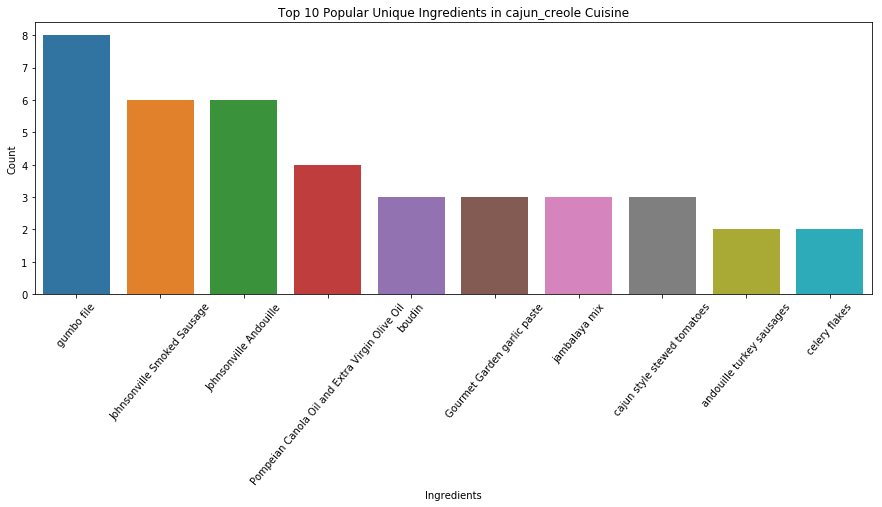

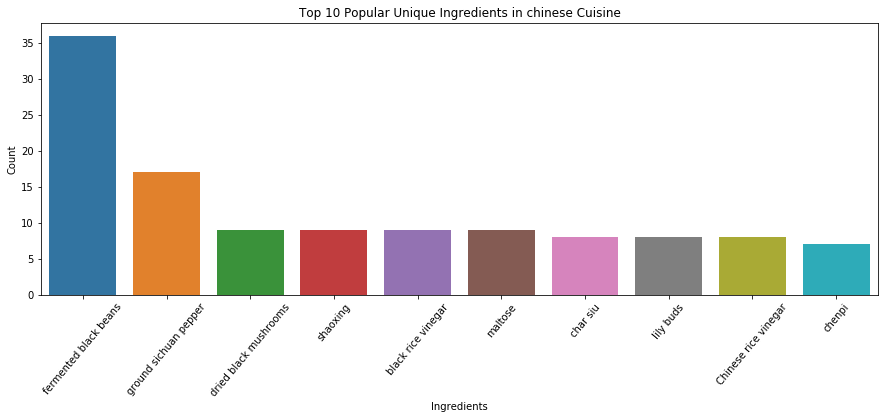

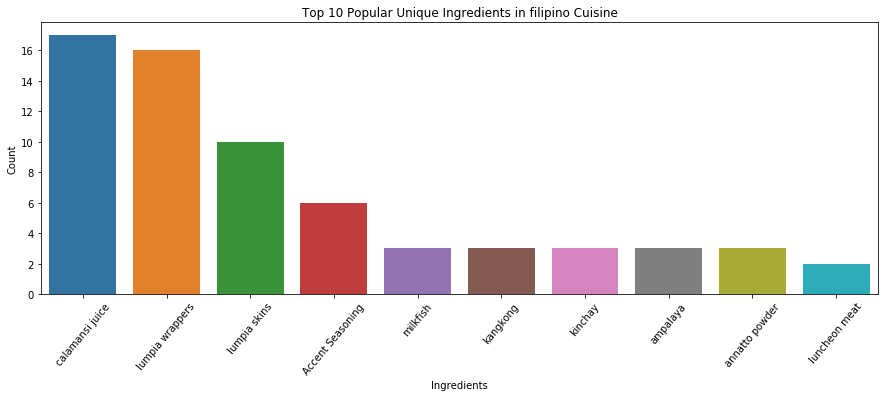

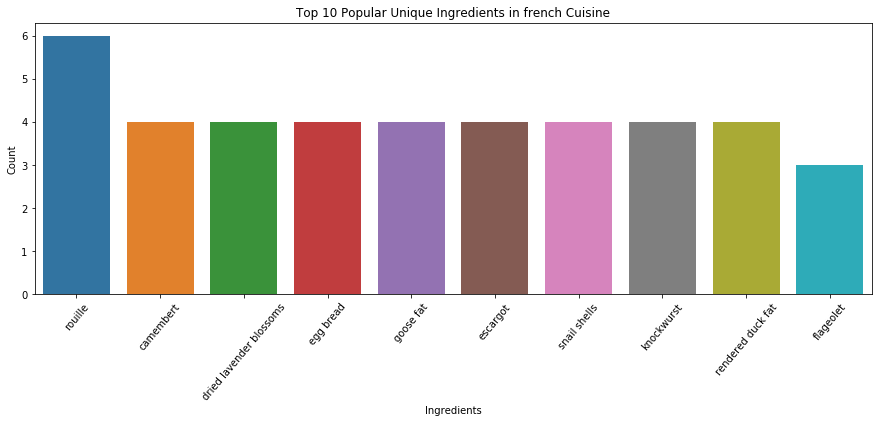

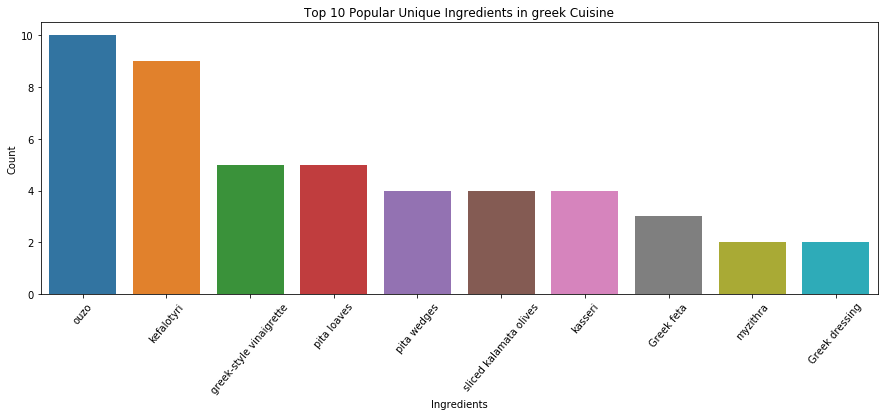

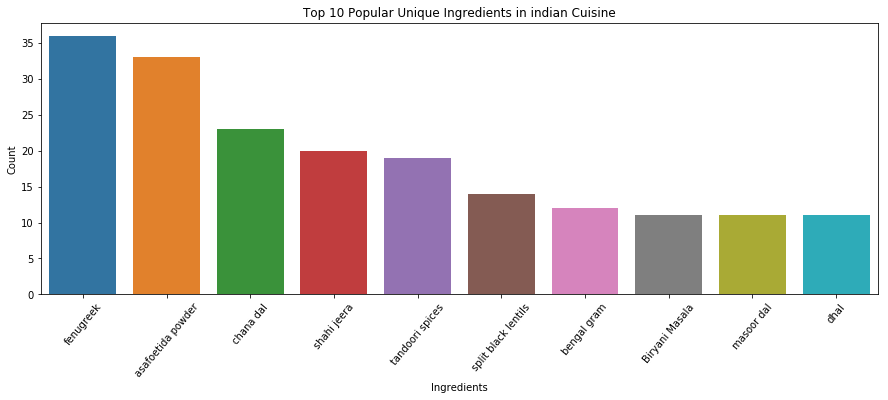

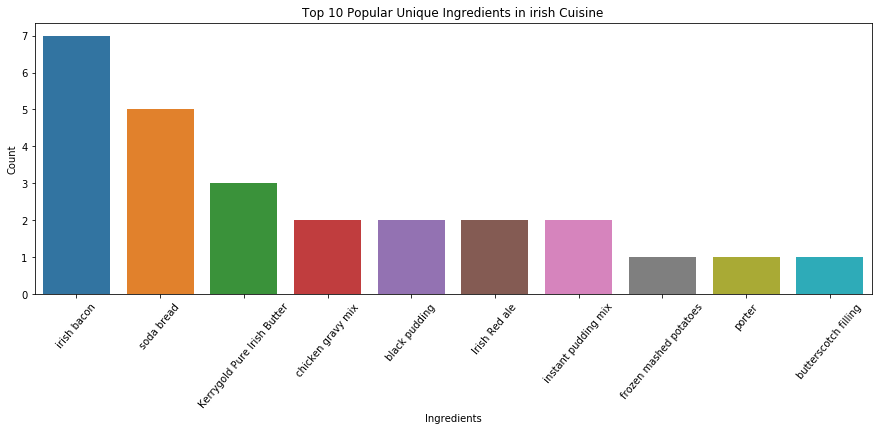

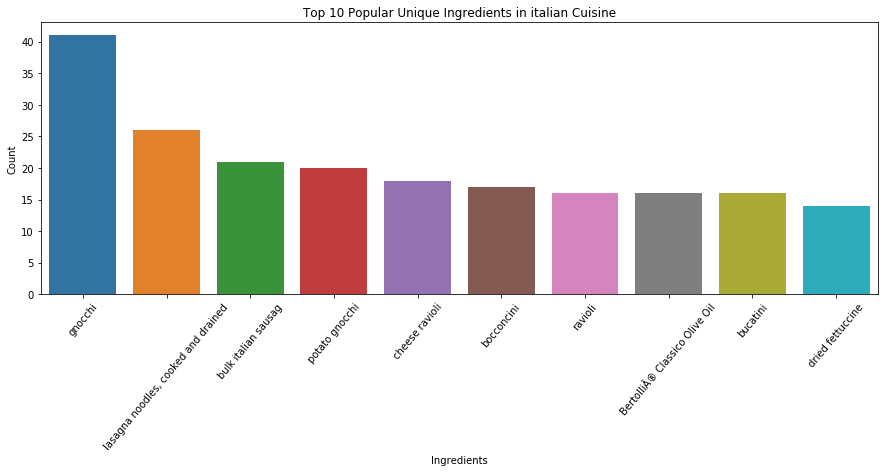

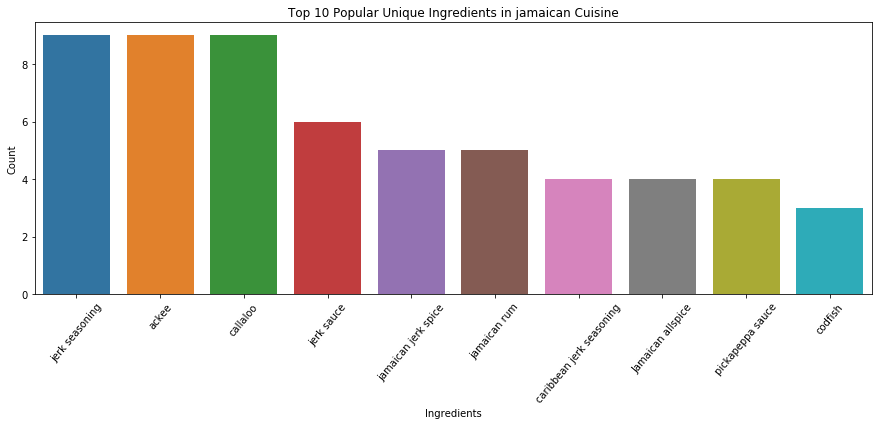

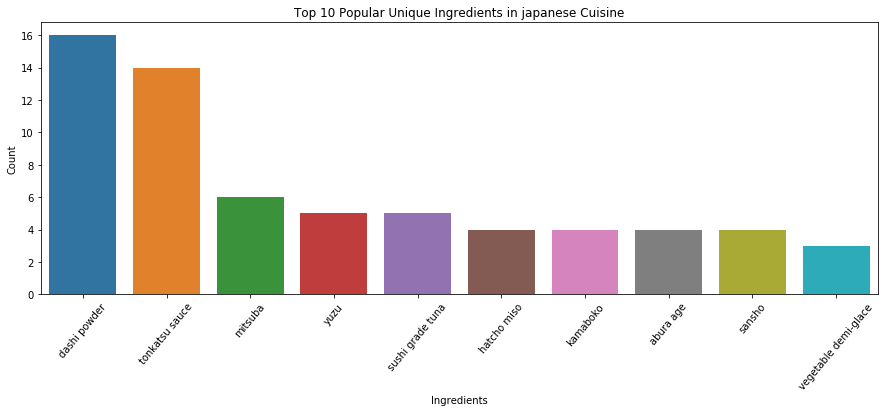

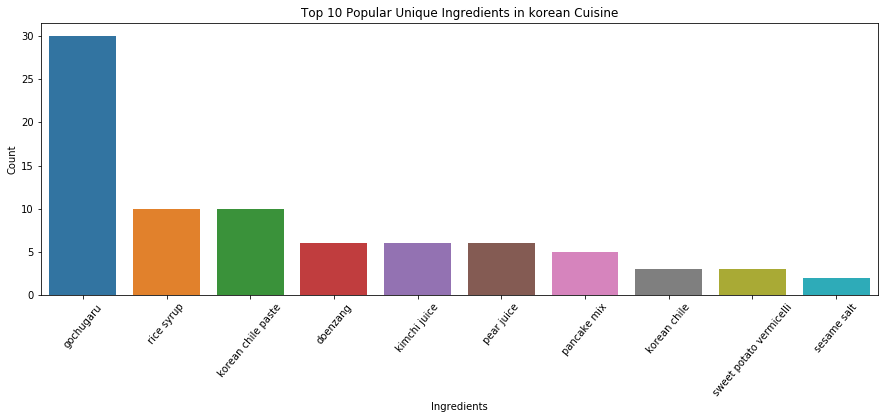

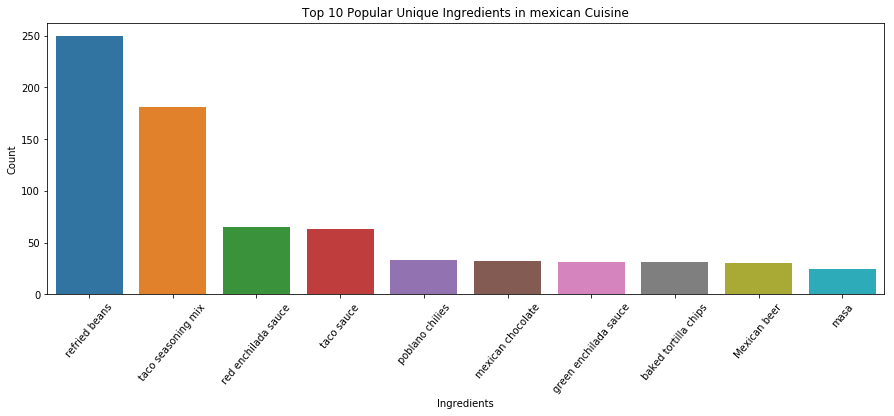

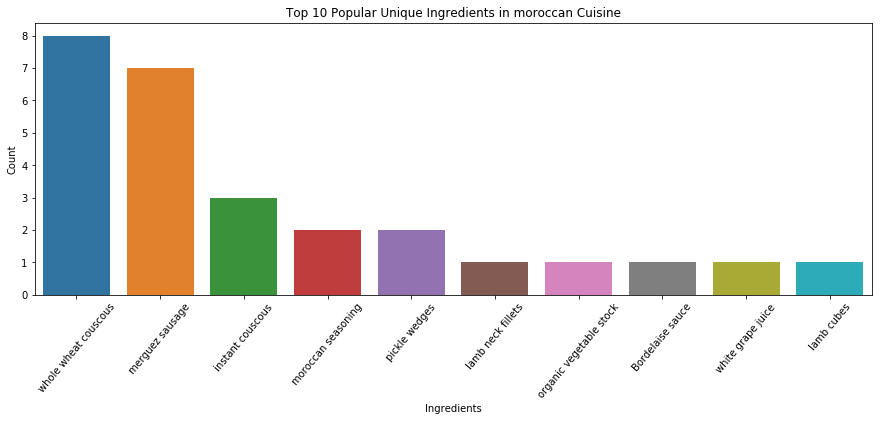

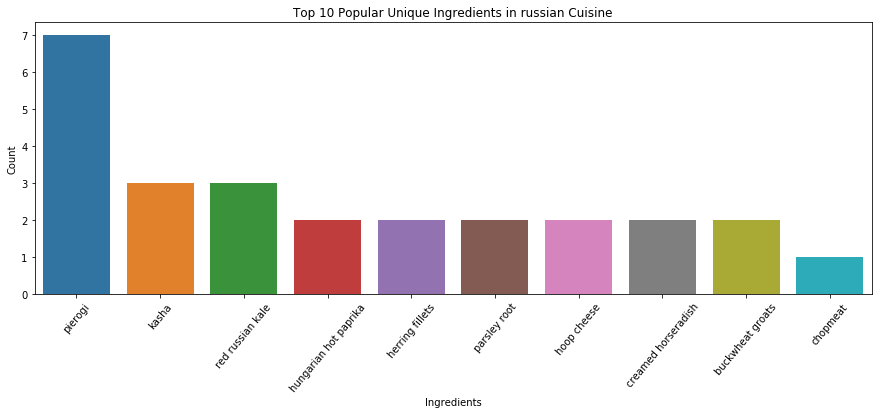

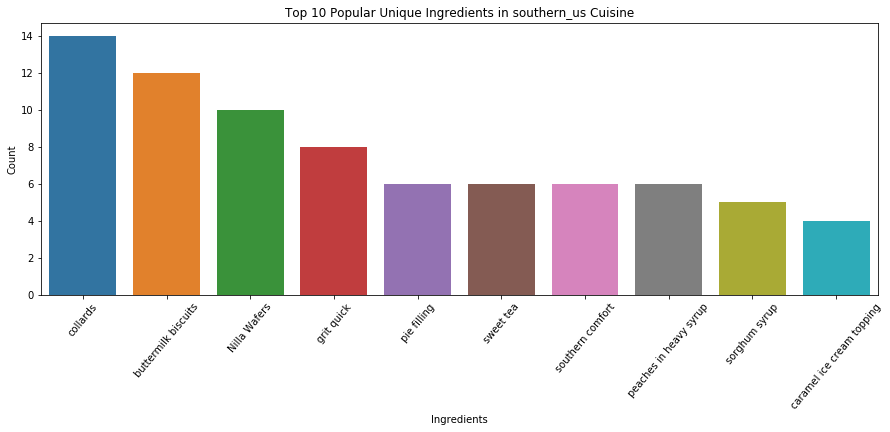

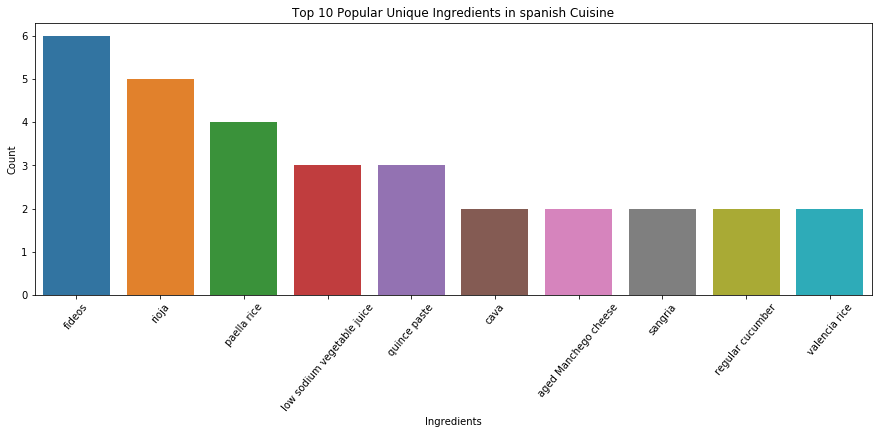

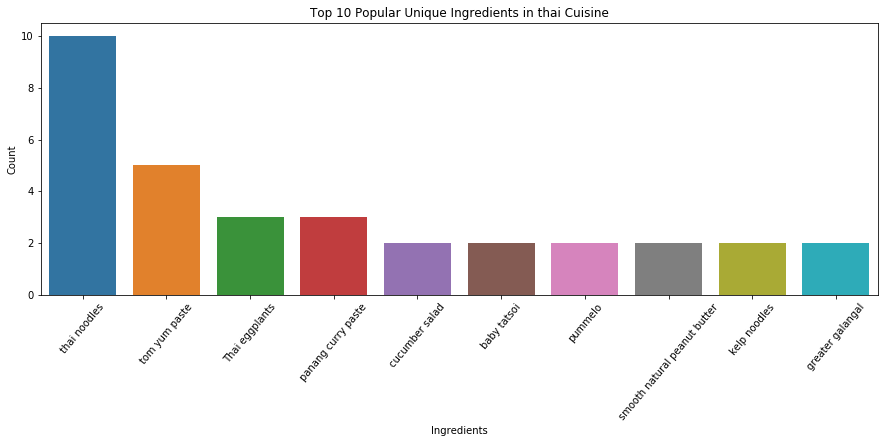

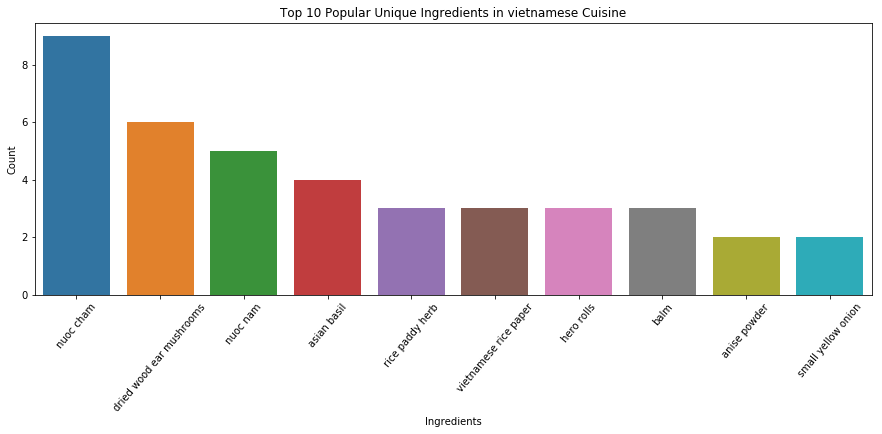

In [24]:
for x, y in enumerate(dfCuisine["Cuisine"]):
    dictCuisIng = dict((z, 0) for z in dfCuisine["Unique Ingredients"][x])
    dfCuisIng = pd.DataFrame(columns = ["Ingredients", "Count"])
    for j in dfRecipe[dfRecipe["cuisine"] == y]["ingredients"]:            
        for k in j:
            if k in dictCuisIng:
                dictCuisIng[k] += 1
                
    dfCuisIng["Ingredients"] = list(dictCuisIng.keys())
    dfCuisIng["Count"] = list(dictCuisIng.values())
    
    plt.figure(figsize = (15, 5))
    a = dfCuisIng.sort_values(by = "Count", ascending = False).head(10)
    ax = sns.barplot(x = "Ingredients", y = "Count", data = a)
    plt.setp(ax.get_xticklabels(), rotation = 50)
    plt.title("Top 10 Popular Unique Ingredients in " + str(y) + " Cuisine")
    plt.show()

In [118]:
totalWords = dfRecipe["ingredients"].apply(lambda x: len(x[0].split(" "))).sum()
print("There are " + str(totalWords) + " words in 'ingredients' column.")

There are 74735 words in 'ingredients' column.


## Data Preprocessing

In [61]:
#Three packages below should be downloaded for tokenization data
# nltk.download("stopwords")
# nltk.download("punkt")
# nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\Benny Y.
[nltk_data]     Pratama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [190]:
#Library for regular expressions
import re

#Library for string manipulation
import string

#Tokenization data
listClean = []
for a in dfRecipe["ingredients"]:
    #Join all words in list, separated with space
    document = " ".join(a)
    
    #Convert words to lowercase
    document = document.lower()
    
    #Remove numbers
    document = re.sub(r"\d+", "", document)
    
    #Remove punctuations
    document = document.translate(str.maketrans("", "", string.punctuation))
    
    #Remove all whitespaces
    document = document.strip()
    
    document = document.split()

    listClean.append(document)  
        
dfRecipe["cleaned"] = listClean
dfRecipe

,cuisine,ingredients,num of ingredients,cleaned
0,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",9,"[romaine, lettuce, black, olives, grape, tomatoes, garlic, pepper, purple, onion, seasoning, garbanzo, beans, feta, cheese, crumbles]"
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",11,"[plain, flour, ground, pepper, salt, tomatoes, ground, black, pepper, thyme, eggs, green, tomatoes, yellow, corn, meal, milk, vegetable, oil]"
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",12,"[eggs, pepper, salt, mayonaise, cooking, oil, green, chilies, grilled, chicken, breasts, garlic, powder, yellow, onion, soy, sauce, butter, chicken, livers]"
3,indian,"[water, vegetable oil, wheat, salt]",4,"[water, vegetable, oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]",20,"[black, pepper, shallots, cornflour, cayenne, pepper, onions, garlic, paste, milk, butter, salt, lemon, juice, water, chili, powder, passata, oil, ground, cumin, boneless, chicken, skinless, thigh, garam, masala, double, cream, natural, yogurt, bay, leaf]"
5,jamaican,"[plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder]",12,"[plain, flour, sugar, butter, eggs, fresh, ginger, root, salt, ground, cinnamon, milk, vanilla, extract, ground, ginger, powdered, sugar, baking, powder]"
6,spanish,"[olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage]",13,"[olive, oil, salt, medium, shrimp, pepper, garlic, chopped, cilantro, jalapeno, chilies, flat, leaf, parsley, skirt, steak, white, vinegar, sea, salt, bay, leaf, chorizo, sausage]"
7,italian,"[sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries]",10,"[sugar, pistachio, nuts, white, almond, bark, flour, vanilla, extract, olive, oil, almond, extract, eggs, baking, powder, dried, cranberries]"
8,mexican,"[olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh]",13,"[olive, oil, purple, onion, fresh, pineapple, pork, poblano, peppers, corn, tortillas, cheddar, cheese, ground, black, pepper, salt, iceberg, lettuce, lime, jalapeno, chilies, chopped, cilantro, fresh]"
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley]",6,"[chopped, tomatoes, fresh, basil, garlic, extravirgin, olive, oil, kosher, salt, flat, leaf, parsley]"


In [191]:
#Library to split data into training data and testing data
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(dfRecipe)

In [192]:
#Library for word embedding
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

#Tag data with target
trainTagged = trainData.apply(lambda x: TaggedDocument(words = x["cleaned"], tags = [x["cuisine"]]), axis = 1)
testTagged = testData.apply(lambda x: TaggedDocument(words = x["cleaned"], tags = [x["cuisine"]]), axis = 1)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000022D5FF6E320>>
Traceback (most recent call last):
  File "C:\Anaconda\Anaconda3\envs\python36\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [193]:
#Library to show process
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

#Create model and build vocabulary
modelD2V = Doc2Vec(workers = 4, vector_size = 200, min_count = 1)
modelD2V.build_vocab([x for x in tqdm(trainTagged.values)])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 29830/29830 [00:00<00:00, 159506.89it/s]


In [194]:
#Train model to learn vocabulary
from sklearn import utils
for epoch in range(50):
    modelD2V.train(utils.shuffle([x for x in tqdm(trainTagged.values)]),
                   total_examples = len(trainTagged.values), epochs = 1)
    #learning rate
    modelD2V.alpha -= 0.002
    modelD2V.min_alpha = modelD2V.alpha

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 29830/29830 [00:00<00:00, 426179.55it/s]


In [195]:
#Function to create learning vector
def vecLearning(model, taggedDocs):
    sents = taggedDocs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps = 20)) for doc in sents])
    return targets, regressors

In [196]:
#Set training data and testing data as learning vector
yTrain, xTrain = vecLearning(modelD2V, trainTagged)
yTest, xTest = vecLearning(modelD2V, testTagged)

## Prediction and Evaluation

In [197]:
#Do prediction with LinearSVC method
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(xTrain, yTrain)

predictions = clf.predict(xTest)

In [198]:
#Show mteric results of predictions
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

print("Classification Report :\n", classification_report(yTest, predictions))
print("Average Precision :", np.mean(precision_score(yTest, predictions, average = None)))
print("Average Recall :", np.mean(recall_score(yTest, predictions, average = None)))
print("Accuracy :", accuracy_score(yTest, predictions))
print("Average F1 Score", np.mean(f1_score(yTest, predictions, average = None)))
print("Matthews Corrcoef :", matthews_corrcoef(yTest, predictions))

Classification Report :
               precision    recall  f1-score   support

   brazilian       0.44      0.09      0.14       141
     british       0.37      0.10      0.16       201
cajun_creole       0.57      0.43      0.49       394
     chinese       0.54      0.70      0.61       664
    filipino       0.32      0.13      0.18       179
      french       0.45      0.42      0.43       618
       greek       0.67      0.38      0.49       300
      indian       0.69      0.76      0.73       737
       irish       0.42      0.08      0.14       182
     italian       0.60      0.81      0.69      1990
    jamaican       0.62      0.16      0.25       126
    japanese       0.66      0.45      0.54       369
      korean       0.48      0.40      0.44       210
     mexican       0.65      0.84      0.74      1574
    moroccan       0.54      0.36      0.43       188
     russian       0.47      0.07      0.12       131
 southern_us       0.53      0.62      0.57      1075
  

## Comparation with other models

In [201]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest)

In [202]:
print("Classification Report :\n", classification_report(yTest, predictions))
print("Average Precision :", np.mean(precision_score(yTest, predictions, average = None)))
print("Average Recall :", np.mean(recall_score(yTest, predictions, average = None)))
print("Accuracy :", accuracy_score(yTest, predictions))
print("Average F1 Score", np.mean(f1_score(yTest, predictions, average = None)))
print("Matthews Corrcoef :", matthews_corrcoef(yTest, predictions))

Classification Report :
               precision    recall  f1-score   support

   brazilian       0.14      0.10      0.12       141
     british       0.08      0.06      0.07       201
cajun_creole       0.28      0.31      0.29       394
     chinese       0.33      0.48      0.39       664
    filipino       0.12      0.11      0.11       179
      french       0.24      0.28      0.26       618
       greek       0.34      0.23      0.27       300
      indian       0.49      0.59      0.54       737
       irish       0.11      0.04      0.06       182
     italian       0.50      0.68      0.57      1990
    jamaican       0.07      0.02      0.04       126
    japanese       0.33      0.18      0.23       369
      korean       0.34      0.17      0.22       210
     mexican       0.56      0.65      0.60      1574
    moroccan       0.12      0.03      0.04       188
     russian       0.07      0.01      0.01       131
 southern_us       0.44      0.42      0.43      1075
  

In [203]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(xTrain, yTrain)

predictions = sgdc.predict(xTest)

In [204]:
print("Classification Report :\n", classification_report(yTest, predictions))
print("Average Precision :", np.mean(precision_score(yTest, predictions, average = None)))
print("Average Recall :", np.mean(recall_score(yTest, predictions, average = None)))
print("Accuracy :", accuracy_score(yTest, predictions))
print("Average F1 Score", np.mean(f1_score(yTest, predictions, average = None)))
print("Matthews Corrcoef :", matthews_corrcoef(yTest, predictions))

Classification Report :
               precision    recall  f1-score   support

   brazilian       0.67      0.01      0.03       141
     british       0.23      0.13      0.17       201
cajun_creole       0.69      0.32      0.44       394
     chinese       0.47      0.68      0.56       664
    filipino       0.43      0.06      0.10       179
      french       0.26      0.62      0.36       618
       greek       0.85      0.13      0.23       300
      indian       0.89      0.48      0.63       737
       irish       0.50      0.01      0.01       182
     italian       0.63      0.75      0.68      1990
    jamaican       0.82      0.14      0.24       126
    japanese       0.90      0.26      0.40       369
      korean       0.57      0.39      0.46       210
     mexican       0.68      0.81      0.74      1574
    moroccan       0.50      0.29      0.37       188
     russian       0.62      0.04      0.07       131
 southern_us       0.49      0.56      0.52      1075
  